# 第19章 马尔可夫链蒙特卡罗法

## 习题19.1

&emsp;&emsp;用蒙特卡罗积分法求
$$
\int_{-\infty}^{\infty} x^2 \exp \left( - \frac{x^2}{2}\right) \mathrm{d} x
$$

**解答：**

**解答思路：**

1. 给出蒙特卡罗积分计算方法
2. 将被积分的函数分解，得到其数学期望表示形式
3. 自编程实现，使用样本均值求近似计算积分

**解答步骤**

**第1步：蒙特卡罗积分计算方法**

&emsp;&emsp;根据书中第19.1.3节的关于蒙特卡罗积分法的描述：

> &emsp;&emsp;假设有一个函数 $h(x)$，目标是计算该函数的积分
> 
> $$
\int_{\mathcal{X}} h(x) \mathrm{d} x
$$
> 
> &emsp;&emsp;如果能够将函数 $h(x)$ 分解成一个函数 $f(x)$ 和一个概率密度函数 $p(x)$ 的乘积的形式, 那么就有
> 
> $$
\int_{\mathcal{X}} h(x) \mathrm{d} x = \int_{\mathcal{X}} f(x) p(x) \mathrm{d} x = E_{p(x)}[f(x)]
$$
> 
> 于是函数 $h(x)$ 的积分可以表示为函数 $f(x)$ 关于概率密度函数 $p(x)$ 的数学期望。实际上, 给定一个概率密度函数 $p(x)$, 只要取 $\displaystyle f(x)=\frac{h(x)}{p(x)}$，就可得上式。就是说, 任何一个函数的积分都可以表示为某一个函数的数学期望的形式。而函数的数学期望又可以通过函数的样本均值估计。于是，就可以利用样本均值来近似计算积分。
> 
> $$
\int_{\mathcal{X}} h(x) \mathrm{d} x = E_{p(x)}[f(x)] \approx \frac{1}{n} \sum_{i=1}^{n} f (x_i)
$$

**第2步：将所积分的函数分解，其得到数学期望表示形式**

&emsp;&emsp;取概率密度函数为标准正态分布的密度函数 $\displaystyle p(x) = \frac{1}{\sqrt{2 \pi}} \exp \left( - \frac{x^2}{2} \right)$，则
$$
f(x) = \frac{h(x)}{p(x)} = \frac{\displaystyle x^2 \exp \left( - \frac{x^2}{2} \right)}{\displaystyle \frac{1}{\sqrt{2 \pi}} \exp \left(- \frac{x^2}{2} \right)} = \sqrt{2 \pi} x^{2}
$$

&emsp;&emsp;将原函数积分表示为函数 $f(x)$ 关于概率密度函数 $p(x)$ 的数学期望

$$
\int_{\mathcal{X}} x^2 \exp \left( - \frac{x^2}{2} \right) \mathrm{d} x = \int_{\mathcal{X}} f(x) p(x) \mathrm{d} x = E_{p(x)}[f(x)]
$$

**第3步：自编程实现，使用样本均值求近似计算积分**

In [1]:
import numpy as np


class MonteCarloIntegration:
    def __init__(self, func_f, func_p):
        # 所求期望的函数
        self.func_f = func_f
        # 抽样分布的概率密度函数
        self.func_p = func_p

    def solve(self, num_samples):
        """
        蒙特卡罗积分法
        :param num_samples: 抽样样本数量
        :return: 样本的函数均值
        """
        samples = self.func_p(num_samples)
        vfunc_f = lambda x: self.func_f(x)
        vfunc_f = np.vectorize(vfunc_f)
        y = vfunc_f(samples)
        return np.sum(y) / num_samples

In [2]:
def func_f(x):
    """定义函数f"""
    return x ** 2 * np.sqrt(2 * np.pi)


def func_p(n):
    """定义在分布上随机抽样的函数g"""
    return np.random.standard_normal(int(n))


# 设置样本数量
num_samples = 1e6

# 使用蒙特卡罗积分法进行求解
monte_carlo_integration = MonteCarloIntegration(func_f, func_p)
result = monte_carlo_integration.solve(num_samples)
print("抽样样本数量:", num_samples)
print("近似解:", result)

抽样样本数量: 1000000.0
近似解: 2.5084502655966445


## 习题19.2

&emsp;&emsp;证明如果马尔可夫链是不可约的，且有一个状态是非周期的，则其他所有状态也是非周期的，即这个马尔可夫链是非周期的。

**解答：**

**解答思路：**  

1. 给出马尔科夫链的基本定义
2. 给出不可约的定义
3. 给出非周期的定义
4. 证明如果马尔可夫链是不可约的，则所有状态周期都相同
5. 证明原命题

**解答步骤：**   

**第1步：马尔可夫链**

&emsp;&emsp;根据书中第19章的定义19.1马尔科夫链的基本定义：

> **定义19.1（马尔科夫链）** 考虑一个随机变量的序列$X = \{ X_0, X_1, \cdots, X_t, \cdots \}$，这里$X_t$表示时刻$t$的随机变量，$t=0,1,2,\cdots$。每个随机变量$X_t(t=0, 1, 2, \cdots)$的取值集合相同，称为状态空间，表示为$\mathcal{S}$。随机变量可以是离散的，也可以是连续的。以上随机变量的序列构成随机过程（stochastic process）。  
> 
> &emsp;&emsp;假设在时刻0的随机变量$X_0$遵循概率分布$P(X_0) = \pi_0$，称为初始状态分布。在某个时刻$t \geqslant 1$的随机变量$X_t$与前一时刻的随机变量$X_{t-1}$之间有条件分布$P(X_t | X_{t-1})$，如果$X_t$只依赖于$X_{t-1}$，而不依赖于过去的随机变量$\{ X_0, X_1, \cdots, X_{t-2}\}$，这一性质称为马尔可夫性，即
> 
> $$
P(X_t | X_0, X_1, \cdots, X_{t-1}) = P(X_t | X_{t-1}), t=1,2,\cdots
$$
> 
> 具有马尔可夫性的随机序列$X = \{ X_0, X_1, \cdots, X_t, \cdots \}$称为马尔可夫链，或马尔可夫过程。条件概率分布$P(X_t | X_{t-1})$称为马尔可夫链的转移概率分布。转移概率分布决定了马尔可夫链的特性。

&emsp;&emsp;根据书中第19.2.2节的状态转移概率：

> $$
P_{ij}^t = P(X_t = i | X_0 = j)
$$
> 表示时刻0从状态$j$出发，时刻$t$到达状态$i$的$t$步转移概率。

**第2步：不可约的定义**

&emsp;&emsp;根据书中第19章的定义19.3的不可约的定义：

> &emsp;&emsp;**定义19.3（不可约）**  设有马尔可夫链 $X= \{ X_0, X_1, \cdots, X_t, \cdots \}$，状态空间为 $\mathcal{S}$，对于任意状态 $i, j \in \mathcal{S}$，如果存在一个时刻 $t(t>0)$ 满足
> 
> $$
P (X_t = i | X_0 =j ) > 0
$$
> 
> 也就是说，时刻0从状态 $j$ 出发, 时刻 $t$ 到达状态 $i$ 的概率大于0，则称此马尔可夫链 $X$ 是不可约的（irreducible），否则称马尔可夫链是可约的（reducible）。

**第3步：非周期的定义**

&emsp;&emsp;根据书中第19章的定义19.4的非周期的定义：

> &emsp;&emsp;**定义19.4（非周期）** 设有马尔可夫链 $X = \{X_0, X_1, \cdots, X_t, \cdots \}$，状态空间为 $\mathcal{S}$，对于任意状态 $i \in \mathcal{S}$，如果时刻0从状态 $i$ 出发，$t$ 时刻返回状态的所有时间长 $\{ t: P( X_t = i | X_0 = i ) > 0 \}$ 的最大公约数是1，则称此马尔可夫链 $X$ 是非周期的（aperiodic），否则称马尔可夫链是周期的（periodic）。

**第4步：证明如果马尔可夫链是不可约的，则所有状态周期都相同**

&emsp;&emsp;如果该马尔可夫链是不可约的，则对于 $\forall i, j \in S$，必然存在时刻 $m, n (m > 0, n > 0)$ 满足 

$$
p_{ij}^{m} > 0, p_{ji}^{n}>0
$$

根据状态转移概率的定义，有 $p_{ij}^{m} = P ( X_m = i | X_0 = j), p_{ji}^{n} = P ( X_n = j | X_0 = i)$

&emsp;&emsp;可得

$$
p_{i i}^{m+n} = \sum_{k \in S} p_{i k}^{m} p_{k i}^{n} \geqslant p_{i j}^{m} p_{j i}^{n}> 0
$$

&emsp;&emsp;则必然存在 $s$ 使得 $P_{j j}^{s}>0$，且满足 

$$
P_{i i}^{m+n+s} \geqslant P_{i j}^{m} P_{j j}^{s} P_{j i}^{n} > 0
$$

&emsp;&emsp;假设状态 $i, j$ 的周期分别是 $d(i), d(j)$，由上两式可知

$$
(m+n) \bmod d(i) = 0 \\
(m+n+s) \bmod d(i) = 0
$$

&emsp;&emsp;所以 $s \bmod d(i) = 0$。

&emsp;&emsp;又因为 $P_{j j}^{s} > 0$，所以 $s \bmod d(j) = 0$。因此 $d(i) \bmod d(j) = 0$。同理可得 $d(j) \bmod d(i) = 0$  

&emsp;&emsp;故 $d(i)==d(j)$，可得如果马尔可夫链是不可约的，所有状态周期都是相同的。

**第5步：证明原命题**

&emsp;&emsp;在不可约的马尔可夫链中如果有一个状态的是非周期的，即其周期为1，则其他所有状态的周期也为1，所以该马尔可夫链是非周期的。原命题得证。

## 习题19.3

&emsp;&emsp;验证具有以下转移概率矩阵的马尔可夫链是可约的，但是非周期的。

$$
P=\left[\begin{array}{cccc}
1 / 2 & 1 / 2 & 0 & 0 \\
1 / 2 & 0 & 1 / 2 & 0 \\
0 & 1 / 2 & 0 & 0 \\
0 & 0 & 1 / 2 & 1
\end{array}\right]
$$

**解答：**

**解答思路：**

1. 给出平稳分布的定义
2. 计算该马尔可夫链的平稳分布
3. 验证该马尔可夫链是可约的
4. 验证该马尔可夫链是非周期的

**解答步骤：**   

**第1步：平稳分布的定义**

&emsp;&emsp;根据书中第19章的定义19.2的平稳分布的定义：

> &emsp;&emsp;**定义19.2（平稳分布）** 设有马尔可夫链 $X=\{ X_0, X_1, \cdots, X_t, \cdots \}$，其状态空间为 $\mathcal{S}$，转移概率矩阵为 $P = (p_{i j})$，如果存在状态空间 $\mathcal{S}$ 上的一个分布
> $$
\pi = \left[ \begin{array}{c}
\pi_1 \\
\pi_2 \\
\vdots
\end{array} \right]
$$
> 使得
> $$
\pi = P \pi
$$
> 则称 $\pi$ 为马尔可夫链 $X = \{X_0, X_1, \cdots, X_t, \cdots \}$ 的平稳分布。

&emsp;&emsp;根据书中第19章的引理19.1：

> **引理19.1** 给定一个马尔可夫链 $ X = \{X_0, X_1, \cdots, X_t, \cdots \}$，状态空间为 $\mathcal{S}$，转移概率矩阵为 $P = (p_{i j})$，则分布 $\pi = (\pi_1, \pi_2, \cdots )^T$ 为 $X$ 的平稳分布的充分必要条件是 $ \pi = (\pi_1, \pi_2, \cdots )^T$ 是下列方程组的解：
> $$
\begin{array}{l}
\displaystyle x_i = \sum_j p_{i j} x_j, \quad i = 1,2, \cdots \\
x_i \geqslant 0, \quad i = 1, 2, \cdots \\
\displaystyle \sum_i x_i = 1
\end{array}
$$

**第2步：计算该马尔可夫链的平稳分布**

&emsp;&emsp;设平稳分布为 $\pi = (x_1, x_2, x_3, x_4)^T$，则由引理19.1可得
$$
\begin{array}{l}
\displaystyle x_1 = \frac{1}{2} x_1 + \frac{1}{2} x_2 \\
\displaystyle x_2 = \frac{1}{2} x_1 + \frac{1}{2} x_3 \\
\displaystyle x_3 = \frac{1}{2} x_2 \\
\displaystyle x_4 = \frac{1}{2} x_3 + 1 x_4 \\
x_1 + x_2 + x_3 + x_4 = 1 \\
x_i \geqslant 0, \quad i = 1, 2, 3, 4
\end{array}
$$
解方程组，得到唯一的平稳分布
$$
\pi = (0, 0, 0, 1)^T
$$

**第3步：验证该马尔可夫链是不可约的**

&emsp;&emsp;此马尔可夫链，转移到状态4后，就在该状态上循环跳转，不能到达状态1、状态2和状态3，最后停留在状态4，故该马尔可夫链是可约的。

**第4步：验证该马尔可夫链是非周期的**

1. 对于状态1，它返回状态1的最小时间长为1，故其所有时间长的最大公约数是1；
2. 对于状态2，它通过$2 \rightarrow 1 \rightarrow 2$返回状态2的时间长为2，通过$2 \rightarrow 1 \rightarrow 1 \rightarrow 2$返回状态2的时间长为3，故其所有时间长的最大公约数是1
3. 对于状态3，它通过$3 \rightarrow 2 \rightarrow 3$返回状态3的时间长为2，通过$3 \rightarrow 2 \rightarrow 1 \rightarrow 1 \rightarrow 2 \rightarrow 3$返回状态3的时间长为5，故其所有时间长的最大公约数是1
4. 对于状态4，它返回状态4的最小时间长为1，故其所有时间长的最大公约数是1

综上，该马尔可夫链是非周期的。

## 习题19.4

&emsp;&emsp;验证具有以下转移概率矩阵的马尔可夫链是不可约的，但是周期性的。

$$
P=\left[\begin{array}{cccc}
0 & 1 / 2 & 0 & 0 \\
1 & 0 & 1 / 2 & 0 \\
0 & 1 / 2 & 0 & 1 \\
0 & 0 & 1 / 2 & 0
\end{array}\right]
$$

**解答：**

**解答思路：**
1. 计算该马尔可夫链的平稳分布
2. 验证该马尔可夫链是不可约的
3. 验证该马尔可夫链是周期性的

**解答步骤：**   

**第1步：计算该马尔可夫链的平稳分布**

&emsp;&emsp;根据书中第19章的定义19.2的平稳分布的定义和引理19.1（同习题19.4），设平稳分布为 $\pi=(x_{1}, x_{2}, x_{3}, x_{4})^{\mathrm{T}}$，则由引理19.1可得：
$$
\begin{array}{l}
\displaystyle x_1 = \frac{1}{2} x_2 \\
\displaystyle x_2 = 1 x_1 + \frac{1}{2} x_3 \\
\displaystyle x_3 = \frac{1}{2} x_2 + 1 x_4 \\
\displaystyle x_4 = \frac{1}{2} x_3 \\
x_1 + x_2 + x_3 + x_4 = 1 \\
x_i \geqslant 0, \quad i = 1, 2, 3, 4
\end{array}
$$
解方程组，得到唯一的平稳分布
$$
\pi=(\frac{1}{6}, \frac{1}{3}, \frac{1}{3}, \frac{1}{6})^T
$$

**第2步：验证该马尔可夫链是不可约的**

&emsp;&emsp;观察到平稳分布各项均大于0，说明此马尔可夫链从任意状态出发，经过若干步之后，可以到达任意状态，故该马尔可夫链是不可约的。

**第3步：验证该马尔可夫链是周期性的**

&emsp;&emsp;该马尔可夫链的转移仅发生在相邻奇偶状态之间，从每个状态出发，返回该状态的时刻都是2的倍数：$\{2, 4, 6, \cdots, 2n\}, n \in N^*$。故该马尔可夫链是周期性的，其周期为2。

## 习题19.5

&emsp;&emsp;证明可逆马尔可夫链一定是不可约的。

**解答：**

**解答思路**

1. 给出可逆马尔可夫链的定义
2. 构造特殊的可逆马尔可夫链
3. 验证其是可约的，原命题不成立

**解答步骤**

**第1步：可逆马尔可夫链**

&emsp;&emsp;根据书中第19章的定义19.6的可逆马尔可夫链的定义：

> &emsp;&emsp;**定义19.6（可逆马尔可夫链）** 设有马尔可夫链 $ X = \{X_0, X_1, \cdots, X_t, \cdots \}$，状态空间为 $\mathcal{S}$，转移概率矩阵为 $P$，如果有状态分布 $\pi = (\pi_1, \pi_2, \cdots )^T$，对于任意状态 $i, j \in \mathcal{S}$，对任意一个时刻 $t$ 满足
> $$
P (X_t = i | X_{t-1} = j) \pi_j = P (X_{t-1} = j | X_t = i) \pi_i, \quad i,j = 1,2, \cdots
$$
> 或简写为
> $$
p_{j i} \pi_j = p_{i j} \pi_{i}, \quad i, j=1,2, \cdots
$$
> 则称此马尔可夫链 $X$ 为可逆马尔可夫链，上式称为细致平衡方程。

**第2步：构造特殊的可逆马尔可夫链**

&emsp;&emsp;对于以单位矩阵做转移矩阵的马尔可夫链，其转移矩阵P
$$
P = \left [ \begin{array}{cccc}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 1
\end{array} \right ]
$$

&emsp;&emsp;对于任意平稳分布 $\pi$，满足$P \pi = \pi$ 恒成立，所以该马尔可夫链是可逆的。

**第3步：验证其是可约的，原命题被证伪**

&emsp;&emsp;对于任意状态 $i \in S$，跳转到其他的状态 $j \in S(j \neq i)$ 的概率始终为0，即 $p^t_{i, j} = 0, \forall t \in N^{*}$。所以该马尔可夫链是可约的。

&emsp;&emsp;这与原命题矛盾，故原命题不成立。

## 习题19.6

&emsp;&emsp;从一般的Metropolis-Hastings算法推导出单分量Metropolis-Hastings算法。

**解答：**

**解答思路：**

1. 给出一般的Metropolis-Hastings算法
2. 给出单分量Metropolis-Hastings算法的基本思想
3. 推导单分量Metropolis-Hastings算法

**解答步骤：**   

**第1步：一般的Metropolis-Hastings算法**

&emsp;&emsp;根据书中第19章的算法19.2的Metropolis-Hastings算法：

> **算法19.2（Metropolis-Hastings算法）**  
> 输入：抽样的目标分布的密度函数$p(x)$，函数$f(x)$；  
> 输出：$p(x)$的随机样本$x_{m+1}, x_{m+2}, \cdots, x_n$，函数样本均值$f_{m n}$；  
> 参数：收敛步数$m$，迭代步数$n$。  
> （1）任意选择一个初始值$x_0$  
> （2） 对 $i=1,2, \cdots, n$循环执行  
> &emsp;&emsp;（a）设状态$x_{i-1} = x$，按照建议分布$q (x, x')$随机抽取一个候选状态$x'$。  
> &emsp;&emsp;（b）计算接受概率
> $$
\alpha (x, x') = \min \left \{ 1, \frac{p (x') q (x', x)}{p(x) q(x, x')} \right \}
$$
> &emsp;&emsp;（c）从区间$(0,1)$中按均匀分布随机抽取一个数$u$。  
> &emsp;&emsp;&emsp;&emsp;&nbsp;若 $u \leqslant \alpha (x, x')$，则状态 $x_i = x'$；否则，状态 $x_i = x$。  
> （3）得到样本集合 $ \{ x_{m+1}, x_{m+2}, \cdots, x_n \}$  
> 计算
> $$
f_{m n} = \frac{1}{n-m} \sum_{i = m + 1}^n f(x_i)
$$

**2. 理解单分量 Metropolis-Hastings 算法的基本思想**

&emsp;&emsp;根据书中第19.4.3节的单分量Metropolis-Hastings算法：

> &emsp;&emsp;在 Metropolis-Hastings 算法中，通常需要对多元变量分布进行抽样，有时对多元变量分布的抽样是困难的。可以对多元变量的每一变量的条件分布依次分别进行抽样，从而实现对整个多元变量的一次抽样, 这就是单分量 Metropolis-Hastings 算法。  
> &emsp;&emsp;假设马尔可夫链的状态由 $k$ 维随机变量表示
> $$
x = (x_1, x_2, \cdots, x_k)^T
$$
> 其中 $x_{j}$ 表示随机变量 $x$ 的第 $j$ 个分量，$j=1,2, \cdots, k$，而 $x^{(i)}$ 表示马尔可夫链在时刻 $i$ 的状态
> $$
x^{(i)} = (x_1^{(i)}, x_2^{(i)}, \cdots, x_k^{(i)})^T, \quad i = 1, 2, \cdots, n
$$
> 其中 $x_j^{(i)}$ 是随机变量 $x^{(i)}$ 的第 $j$ 个分量，$j = 1, 2, \cdots, k$。  
> &emsp;&emsp;为了生成容量为 $n$ 的样本集合 $\{ x^{(1)}, x^{(2)}, \cdots, x^{(n)} \}$，单分量 Metropolis-Hastings 算法由下面的 $k$ 步迭代实现 Metropolis-Hastings 算法的一次迭代。  
> &emsp;&emsp;设在第 $(i-1)$ 次迭代结束时分量 $x_j$ 的取值为 $x_j^{(i-1)}$，在第 $i$ 次迭代的第 $j$ 步，对分量 $x_j$ 根据 Metropolis-Hastings 算法更新，得到其新的取值 $x_j^{(i)}$。首先，由建议分布 $q (x_j^{(i-1)}, x_j | x_{-j}^{(i)})$ 抽样产生分量 $x_j$ 的候选值 $x{'}_j^{(i)}$，这里 $x_{-j}^{(i)}$ 表示在第 $i$ 次迭代的第 $(j-1)$ 步后的 $x^{(i)}$ 除去 $x_j^{(i-1)}$ 的所有值，即
> $$
x_{-j}^{(i)}=(x_1^{(i)}, \cdots, x_{j-1}^{(i)}, x_{j+1}^{(i-1)}, \cdots, x_k^{(i-1)})^T
$$
> 其中分量 $1, 2, \cdots, j-1$ 已经更新。然后，按照接受概率
> $$
\alpha \left( x_j^{(i-1)}, x{'}_j^{(i)} | x_{-j}^{(i)} \right ) = \min \left\{ 1, \frac
{p \left( x{'}_j^{(i)} | x_{-j}^{(i)} \right) q \left( x{'}_j^{(i)}, x_j^{(i-1)} | x_{-j}^{(i)} \right)}
{p \left( x_j^{(i-1)} | x_{-j}^{(i)} \right) q \left( x_j^{(i-1)}, x{'}_j^{(i)} | x_{-j}^{(i)} \right)} 
\right \}
$$
> 抽样决定是否接受候选值 $x{'}_j^{(i)}$ 。如果 $x{'}_j^{(i)}$ 被接受，则令 $x_j^{(i)}=x{'}_j^{(i)}$；否则令 $x_j^{(i)} = x_{j}^{(i-1)}$。其余分量在第 $j$ 步不改变。马尔可夫链的转移概率为
> $$
p\left( x_j^{(i-1)}, x{'}_j^{(i)} | x_{-j}^{(i)} \right) 
= \alpha \left(
x_j^{(i-1)}, x{'}_{j}^{(i)} | x_{-j}^{(i)} \right) q \left(x_j^{(i-1)}, x{'}_j^{(i)} | x_{-j}^{(i)} \right)
$$

**3. 推导单分量 Metropolis-Hastings 算法**

**单分量 Metropolis-Hastings 算法**  
输入：抽样的目标分布的密度函数 $p(x)$，函数 $f(x)$，其中 $x = \left( x_1, x_2, \cdots, x_k \right)^T$；  
输出：$p(x)$ 的随机样本 $\{ x^{(m+1)}, x^{(m+2)}, \cdots, x^{(n)} \}$，函数样本均值 $f_{m n}$；  
参数：收敛步数 $m$, 迭代步数 $n$。  
（1）任意选择一个初始值 $x_0$  
（2）对 $i = 1, 2, \cdots, n$ 循环执行  
&emsp;&emsp;设在第 $(i-1)$ 次迭代结束时分量 $x_{j}$ 的取值为 $x_{j}^{(i-1)}$  
&emsp;&emsp;（a）对 $j=1,2, \cdots, k$ 循环执行  
&emsp;&emsp;&emsp;&emsp;（i）在第 $i$ 次迭代的第 $j$ 步，由建议分布 $q (x_j^{(i-1)}, x_j | x_{-j}^{(i)})$ 抽样产生分量 $x_j$ 的候选值 $x{'}_j^{(i)}$，  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;这里 $x_{-j}^{(i)}$ 表示在第 $i$ 次迭代的第 $(j-1)$ 步后的 $x^{(i)}$ 除去 $x_j^{(i-1)}$ 的所有值，即
$$
x_{-j}^{(i)}=(x_1^{(i)}, \cdots, x_{j-1}^{(i)}, x_{j+1}^{(i-1)}, \cdots, x_k^{(i-1)})^T
$$  
&emsp;&emsp;&emsp;&emsp;（ii）计算接受概率
$$
\alpha \left( x_j^{(i-1)}, x{'}_j^{(i)} | x_{-j}^{(i)} \right ) = \min \left\{ 1, \frac
{p \left( x{'}_j^{(i)} | x_{-j}^{(i)} \right) q \left( x{'}_j^{(i)}, x_j^{(i-1)} | x_{-j}^{(i)} \right)}
{p \left( x_j^{(i-1)} | x_{-j}^{(i)} \right) q \left( x_j^{(i-1)}, x{'}_j^{(i)} | x_{-j}^{(i)} \right)} 
\right \}
$$
&emsp;&emsp;&emsp;&emsp;（iii）从区间 $(0,1)$ 中按均匀分布随机抽取一个数 $u$。  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;若 $u \leqslant \alpha \left( x_j^{(i-1)}, x{'}_j^{(i)} | x_{-j}^{(i)} \right )$，则状态 $x_j^{(i)} = x{'}_j^{(i)}$；否则，状态 $x_j^{(i)} = x_j^{(i-1)}$。  
（3）得到样本集合 $\{ x^{(m+1)}, x^{(m+2)}, \cdots, x^{(n)} \}$  
计算
$$
f_{m n} = \frac{1}{n - m} \sum_{i = m + 1}^n f (x^{(i)})
$$

## 习题19.7

&emsp;&emsp;假设进行伯努利实验，后验概率为 $P(\theta | y)$，其中变量 $y \in \{ 0, 1 \}$ 表示实验可能的结果，变量 $\theta$ 表示结果为 1 的概率。再假设先验概率 $P(\theta)$ 遵循 Beta 分布 $B(\alpha, \beta)$，其中 $\alpha = 1, \beta = 1$；似然函数 $P(y | \theta)$ 遵循二项分布$ \text{Bin}(n, k, \theta)$，其中 $n = 10, k = 4$，即实验进行 10 次其中结果为 1 的次数为 4。试用 Metropolis-Hastings 算法求后验概率分布 $P(\theta | y) \propto P(\theta) P(y | \theta)$ 的均值和方差。（提示：可采用 Metropolis 选择，即假设建议分布是对称的。）

**解答：**

**解题思路**

1. 给出 Metropolis-Hastings 算法
2. 写出目标分布和建议分布
3. 自编程实现 Metropolis-Hastings 算法求解

**解答步骤**

**第1步：Metropolis-Hastings 算法**  

&emsp;&emsp;Metropolis-Hastings 算法的步骤详见书中第373~374页算法19.2。

**第2步：写出目标分布和建议分布**

&emsp;&emsp;根据题意，可知后验概率 $P(\theta) \propto B(1, 1)$，后验函数 $P(y | \theta) \propto \text{Bin}(10, 4, \theta)$

&emsp;&emsp;则后验概率分布
$$
\begin{aligned}
P(\theta | y)
& \propto P(\theta) P(y | \theta) \\
& \propto B(1, 1) \text{Bin}(10, 4, \theta)
\end{aligned}
$$

&emsp;&emsp;可取建议分布为 $B(1, 1)$，接受分布为 $\text{Bin}(10, 4, \theta)$

**第3步：自编程实现 Metropolis-Hastings 算法求解**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, binom


class MetropolisHastings:
    def __init__(self, proposal_dist, accepted_dist, m=1e4, n=1e5):
        """
        Metropolis Hastings

        :param proposal_dist: 建议分布
        :param accepted_dist: 接受分布
        :param m: 收敛步数
        :param n: 迭代步数
        """
        self.proposal_dist = proposal_dist
        self.accepted_dist = accepted_dist
        self.m = m
        self.n = n

    @staticmethod
    def __calc_acceptance_ratio(q, p, x, x_prime):
        """
        计算接受概率

        :param q: 建议分布
        :param p: 接受分布
        :param x: 上一状态
        :param x_prime: 候选状态
        """
        prob_1 = p.prob(x_prime) * q.joint_prob(x_prime, x)
        prob_2 = p.prob(x) * q.joint_prob(x, x_prime)
        alpha = np.min((1., prob_1 / prob_2))
        return alpha

    def solve(self):
        """
        Metropolis Hastings 算法求解
        """
        all_samples = np.zeros(self.n)
        # (1) 任意选择一个初始值
        x_0 = np.random.random()
        for i in range(int(self.n)):
            x = x_0 if i == 0 else all_samples[i - 1]
            # (2.a) 从建议分布中抽样选取
            x_prime = self.proposal_dist.sample()
            # (2.b) 计算接受概率
            alpha = self.__calc_acceptance_ratio(self.proposal_dist, self.accepted_dist, x, x_prime)
            # (2.c) 从区间 (0,1) 中按均匀分布随机抽取一个数 u
            u = np.random.uniform(0, 1)
            # 根据 u <= alpha，选择 x 或 x_prime 进行赋值
            if u <= alpha:
                all_samples[i] = x_prime
            else:
                all_samples[i] = x

        # (3) 随机样本集合
        samples = all_samples[self.m:]
        # 函数样本均值
        dist_mean = samples.mean()
        # 函数样本方差
        dist_var = samples.var()
        return samples[self.m:], dist_mean, dist_var

    @staticmethod
    def visualize(samples, bins=50):
        """
        可视化展示
        :param samples: 抽取的随机样本集合
        :param bins: 频率直方图的分组个数
        """
        fig, ax = plt.subplots()
        ax.set_title('Metropolis Hastings')
        ax.hist(samples, bins, alpha=0.7, label='Samples Distribution')
        ax.set_xlim(0, 1)
        ax.legend()
        plt.show()

In [4]:
class ProposalDistribution:
    """
    建议分布
    """

    @staticmethod
    def sample():
        """
        从建议分布中抽取一个样本
        """
        # B(1,1)
        return beta.rvs(1, 1, size=1)

    @staticmethod
    def prob(x):
        """
        P(X = x) 的概率
        """
        return beta.pdf(x, 1, 1)

    def joint_prob(self, x_1, x_2):
        """
        P(X = x_1, Y = x_2) 的联合概率
        """
        return self.prob(x_1) * self.prob(x_2)

In [5]:
class AcceptedDistribution:
    """
    接受分布
    """

    @staticmethod
    def prob(x):
        """
        P(X = x) 的概率
        """
        # Bin(4, 10)
        return binom.pmf(4, 10, x)

均值: 0.4159270490443074
方差: 0.019403228732637397


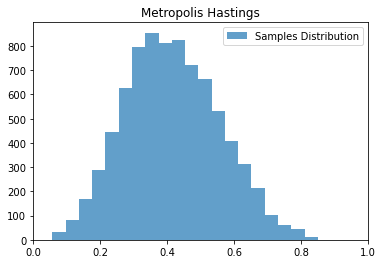

In [10]:
import warnings
warnings.filterwarnings("ignore")

# 收敛步数
m = 1000
# 迭代步数
n = 10000

# 建议分布
proposal_dist = ProposalDistribution()
# 接受分布
accepted_dist = AcceptedDistribution()

metropolis_hastings = MetropolisHastings(proposal_dist, accepted_dist, m, n)

# 使用 Metropolis-Hastings 算法进行求解
samples, dist_mean, dist_var = metropolis_hastings.solve()
print("均值:", dist_mean)
print("方差:", dist_var)

# 对结果进行可视化
metropolis_hastings.visualize(samples, bins=20)

## 习题19.8

&emsp;&emsp;设某试验可能有五种结果，其出现的概率分别为
$$
\frac{\theta}{4}+\frac{1}{8}, \quad \frac{\theta}{4}, \quad \frac{\eta}{4}, \quad \frac{\eta}{4}+\frac{3}{8}, \quad \frac{1}{2}(1-\theta-\eta)
$$
模型含有两个参数 $\theta$ 和 $\eta$，都介于 0 和 1 之间。现有 22 次试验结果的观测值为
$$
y = (y_1, y_2, y_3, y_4, y_5) = (14, 1, 1, 1, 5)
$$
其中 $y_i$ 表示 22 次试验中第 $i$ 个结果出现的次数，$i = 1,2,\cdots,5$。试用吉布斯抽样估计参数 $\theta$ 和 $\eta$ 的均值和方差。

**解答**

**解题思路**

1. 给出吉布斯抽样算法
2. 定义目标概率的密度函数和各参数的满条件分布
3. 自编程实现吉布斯抽样算法进行求解

**解答步骤**

**第1步：吉布斯抽样算法**

&emsp;&emsp;根据书中第19.5.2节的吉布斯抽样算法的描述：

> **算法19.3(吉布斯抽样)**  
> 输入：目标概率分布的密度函数 $p(x)$，函数 $f(x)$；  
> 输出：$p(x)$ 的随机样本 $x_{m+1}, x_{m+2}, \cdots, x_{n}$，函数样本均值 $f_{m n}$；  
> 参数：收敛步数 $m$，迭代步数 $n$。  
> （1）初始化。给出初始样本 $x^{(0)} = \left( x_1^{(0)}, x_2^{(0)}, \cdots, x_k^{(0)} \right)^T$。  
> （2）对 $i$ 循环执行  
> 设第 $(i-1)$ 次迭代结束时的样本为 $x^{(i-1)} = \left( x_1^{(i-1)}, x_2^{(i-1)}, \cdots, x_k^{(i-1)} \right)^T$，则第 $i$ 次迭代进行如下几步操作：
> $$
\left \{ 
\begin{array}{l}
\text {(1) 由满条件分布 } p \left( x_1 | x_2^{(i-1)}, \cdots, x_k^{(i-1)} \right) \text { 抽取 } x_1^{(i)} \\
\quad \quad \vdots \\
\text {(j) 由满条件分布 } p \left( x_j | x_1^{(i)}, \cdots, x_{j-1}^{(i)}, x_{j+1}^{(i-1)}, \cdots, x_k^{(i-1)} \right) \text{ 抽取 } x_j^{(i)} \\
\quad \quad \vdots \\
\text {(k) 由满条件分布 } p \left( x_k | x_1^{(i)}, \cdots, x_{k-1}^{(i)} \right) \text { 抽取 } x_k^{(i)}
\end{array}
\right.
$$
> 得到第 $i$ 次迭代值 $x^{(i)} = \left( x_1^{(i)}, x_2^{(i)}, \cdots, x_k^{(i)} \right)^T$。  
> （3）得到样本集合
> $$
\{ x^{(m+1)}, x^{(m+2)}, \cdots, x^{(n)} \}
$$
> （4）计算
> $$
f_{m n} = \frac{1}{n-m} \sum_{i=m+1}^n f (x^{(i)})
$$

**第2步：定义目标概率的密度函数和各参数的满条件分布**

&emsp;&emsp;根据题意，可知目标概率的分布函数为
$$
\begin{aligned}
P
&= (p_1, p_2, p_3, p_4, p_5) \\
&= (\frac{\theta}{4}+\frac{1}{8},\ \frac{\theta}{4}, \ \frac{\eta}{4}, \ \frac{\eta}{4}+\frac{3}{8}, \ \frac{1}{2}(1-\theta-\eta))
\end{aligned}
$$

&emsp;&emsp;可得：
$$
\begin{array}{l}
\displaystyle \frac{\theta}{4}+\frac{1}{8} > 0 \\
\displaystyle \frac{\theta}{4} > 0 \\
\displaystyle \frac{\eta}{4} > 0 \\
\displaystyle \frac{\eta}{4}+\frac{3}{8} > 0 \\
\displaystyle \frac{1}{2}(1-\theta-\eta) > 0 \\
\displaystyle \frac{\theta}{4}+\frac{1}{8} + \frac{\theta}{4} + \frac{\eta}{4} + \frac{\eta}{4}+\frac{3}{8} + \frac{1}{2}(1-\theta-\eta) = 1 \\
0 < \theta < 1 \\
0 < \eta < 1 \\
\end{array}
$$

&emsp;&emsp;求解得到：

$$
\begin{array}{l}
\theta + \eta < 1 \\
0 < \theta < 1 \\
0 < \eta < 1 \\
\end{array}
$$

&emsp;&emsp;则参数 $\theta$ 和 $\eta$ 的满分布条件概率为
$$
P (\theta | y, \eta) = \left( \left( \frac{\theta}{4}+\frac{1}{8} \right)^{14}, \ \frac{\theta}{4}, \ \frac{\eta}{4}, \ \frac{\eta}{4}+\frac{3}{8}, \ \left( \frac{1}{2} (1-\theta-\eta) \right)^5 \right), \quad \theta \in (0, 1-\eta) \\
P (\eta | y, \theta) = \left( \left( \frac{\theta}{4}+\frac{1}{8} \right)^{14}, \ \frac{\theta}{4}, \ \frac{\eta}{4}, \ \frac{\eta}{4}+\frac{3}{8}, \ \left( \frac{1}{2} (1-\theta-\eta) \right)^5 \right), \quad \eta \in (0, 1-\theta)
$$

**第2步：编程实现吉布斯抽样算法进行求解**

In [7]:
import matplotlib.pyplot as plt
import numpy as np


class GibbsSampling:
    def __init__(self, target_dist, j, m=1e4, n=1e5):
        """
        Gibbs Sampling 算法

        :param target_dist: 目标分布
        :param j: 变量维度
        :param m: 收敛步数
        :param n: 迭代步数
        """
        self.target_dist = target_dist
        self.j = j
        self.m = int(m)
        self.n = int(n)

    def solve(self):
        """
        Gibbs Sampling 算法求解
        """
        # (1) 初始化
        all_samples = np.zeros((self.n, self.j))
        # 任意选择一个初始值
        x_0 = np.random.random(self.j)
        # x_0 = np.array([0.5, 0.5])
        # (2) 循环执行
        for i in range(self.n):
            x = x_0 if i == 0 else all_samples[i - 1]
            # 满条件分布抽取
            for k in range(self.j):
                x[k] = self.target_dist.sample(x, k)
            all_samples[i] = x
        # (3) 得到样本集合
        samples = all_samples[self.m:]
        # (4) 计算函数样本均值
        dist_mean = samples.mean(0)
        dist_var = samples.var(0)
        return samples[self.m:], dist_mean, dist_var

    @staticmethod
    def visualize(samples, bins=50):
        """
        可视化展示
        :param samples: 抽取的随机样本集合
        :param bins: 频率直方图的分组个数
        """
        fig, ax = plt.subplots()
        ax.set_title('Gibbs Sampling')
        ax.hist(samples[:, 0], bins, alpha=0.7, label='$\\theta$')
        ax.hist(samples[:, 1], bins, alpha=0.7, label='$\\eta$')
        ax.set_xlim(0, 1)
        ax.legend()
        plt.show()

In [8]:
class TargetDistribution:
    """
    目标概率分布
    """

    def __init__(self):
        # 联合概率值过小，可对建议分布进行放缩
        self.c = self.__select_prob_scaler()

    def sample(self, x, k=0):
        """
        使用接受-拒绝方法从满条件分布中抽取新的分量 x_k
        """
        theta, eta = x
        if k == 0:
            while True:
                new_theta = np.random.uniform(0, 1 - eta)
                alpha = np.random.uniform()
                if (alpha * self.c) < self.__prob([new_theta, eta]):
                    return new_theta
        elif k == 1:
            while True:
                new_eta = np.random.uniform(0, 1 - theta)
                alpha = np.random.uniform()
                if (alpha * self.c) < self.__prob([theta, new_eta]):
                    return new_eta

    def __select_prob_scaler(self):
        """
        选择合适的建议分布放缩尺度
        """
        prob_list = []
        step = 1e-3
        for theta in np.arange(step, 1, step):
            for eta in np.arange(step, 1 - theta + step, step):
                prob = self.__prob((theta, eta))
                prob_list.append(prob)
        searched_max_prob = max(prob_list)
        upper_bound_prob = searched_max_prob * 10
        return upper_bound_prob

    @staticmethod
    def __prob(x):
        """
        P(X = x) 的概率
        """
        theta = x[0]
        eta = x[1]
        p1 = (theta / 4 + 1 / 8) ** 14
        p2 = theta / 4
        p3 = eta / 4
        p4 = (eta / 4 + 3 / 8)
        p5 = 1 / 2 * (1 - theta - eta) ** 5
        p = (p1 * p2 * p3 * p4 * p5)
        return p

theta均值：0.5201289483641778, theta方差：0.017691128644918685
eta均值：0.12203712909117162, eta方差：0.0064478491785926505


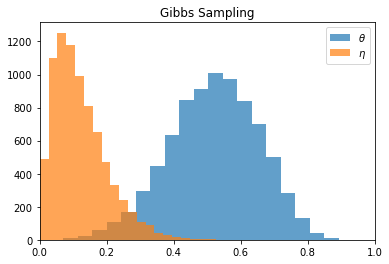

In [9]:
# 收敛步数
m = 1e3
# 迭代步数
n = 1e4

# 目标分布
target_dist = TargetDistribution()

# 使用 Gibbs Sampling 算法进行求解
gibbs_sampling = GibbsSampling(target_dist, 2, m, n)

samples, dist_mean, dist_var = gibbs_sampling.solve()

print(f'theta均值：{dist_mean[0]}, theta方差：{dist_var[0]}')
print(f'eta均值：{dist_mean[1]}, eta方差：{dist_var[1]}')

# 对结果进行可视化
GibbsSampling.visualize(samples, bins=20)